# Regression on California Test Scores

1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables

In [207]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl

In [208]:
#Import data
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")
df.head()

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


Text(0.5, 1.0, 'Test Score Distribution')

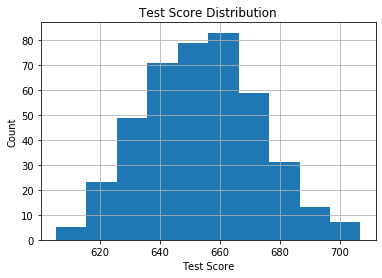

In [209]:
#Create histogram for Test Scores
from matplotlib import pyplot as plt 
df['testscr'].hist()
plt.xlabel('Test Score')
plt.ylabel('Count')
plt.title('Test Score Distribution')

Text(0.5, 1.0, 'Computer per Student Distribution')

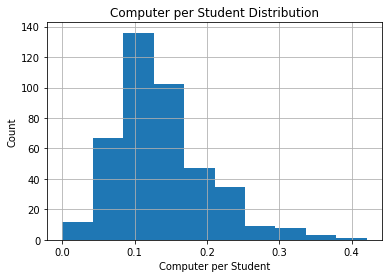

In [210]:
#Histogram for 3 continous variables
df['compstu'].hist()
plt.xlabel('Computer per Student')
plt.ylabel('Count')
plt.title('Computer per Student Distribution')

Text(0.5, 1.0, 'Expenditure per Student Distribution')

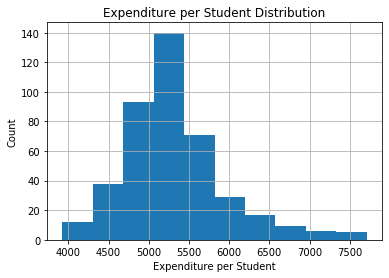

In [211]:
df['expnstu'].hist()
plt.xlabel('Expenditure per Student')
plt.ylabel('Count')
plt.title('Expenditure per Student Distribution')

Text(0.5, 1.0, 'District Average Income Distribution')

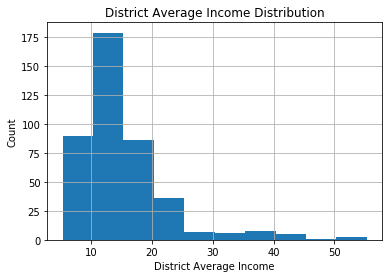

In [212]:
df['avginc'].hist()
plt.xlabel('District Average Income')
plt.ylabel('Count')
plt.title('District Average Income Distribution')

1.2 Visualize the dependency of the target on each feature from 1.1.

Text(0, 0.5, 'Computer per Student')

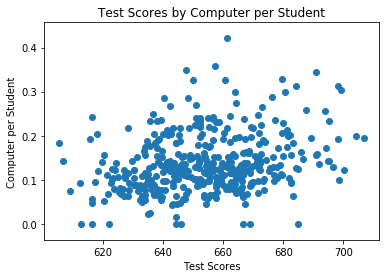

In [213]:
#Create scatter between 3 features on the target
plt.scatter(df['testscr'], df['compstu'])
plt.title("Test Scores by Computer per Student")
plt.xlabel("Test Scores")
plt.ylabel("Computer per Student")

Text(0, 0.5, 'Expenditure per Student')

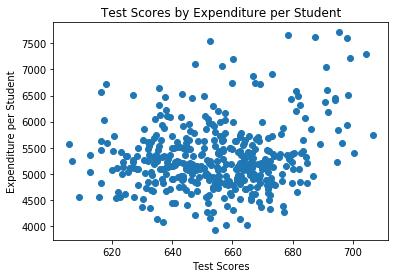

In [214]:
plt.scatter(df['testscr'], df['expnstu'])
plt.title("Test Scores by Expenditure per Student")
plt.xlabel("Test Scores")
plt.ylabel("Expenditure per Student")

Text(0, 0.5, 'District Average Income')

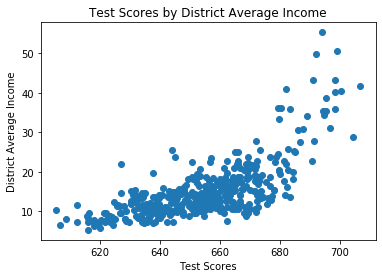

In [215]:
plt.scatter(df['testscr'], df['avginc'])
plt.title("Test Scores by District Average Income")
plt.xlabel("Test Scores")
plt.ylabel("District Average Income")

1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Scale the data with standard scaler if possible. 

In [216]:
#Drop non-continuous variables, readscr and mathscr and prepare data for train test split
data = df.iloc[:, 5:-2]
y = data['testscr']
X = data.loc[:, data.columns != 'testscr']

print(y[0:5])
X.head()

0    690.799988
1    661.200012
2    643.599976
3    647.700012
4    640.849976
Name: testscr, dtype: float64


,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,0.128090,5235.987793,18.671329,9.080333,13.857677


In [217]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
3,243,14.000000,36.475399,77.049202,85,0.349794,7101.831055,17.357143,8.978000,0.000000
18,6880,303.029999,21.282400,94.971199,960,0.139535,5064.615723,22.704023,7.022000,77.005814
393,141,6.910000,10.071900,9.352500,44,0.312057,6060.256836,20.405210,20.089001,0.000000
60,723,37.119999,25.921101,83.157898,45,0.062241,4692.493652,19.477371,8.279000,36.929462
203,307,15.850000,5.537500,28.664499,36,0.117264,4718.163086,19.369085,14.578000,7.491857


In [218]:
#KNN for regression
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

print("accuracy: {:.4f}".format(knn.score(X_test, y_test)))

y_pred = knn.predict(X_test)

accuracy: 0.0849


In [219]:
#KNN with CV
from sklearn.model_selection import cross_val_score
kfold = KFold()
knn_cv = KNeighborsRegressor()
cv_scores = cross_val_score(knn_cv, X_train, y_train,cv=kfold)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[-0.21471211 -0.10450747 -0.0114979 ]
cv_scores mean:-0.11023915830379116


C:\Users\sherr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:431: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


In [220]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.4f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.4f}".format(lr.score(X_test, y_test)))

Training set score: 0.8055
Test set score: 0.8070


In [221]:
#Linear Regression with CV
print(np.mean(cross_val_score(LinearRegression(), X_train, y_train,cv=kfold, scoring="r2")))

0.7757536290456484


In [222]:
#Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.4f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.4f}".format(ridge.score(X_test, y_test)))

Training set score: 0.8055
Test set score: 0.8075


In [223]:
#Ridge regression with CV
print(np.mean(cross_val_score(Ridge(), X_train, y_train,cv=kfold)))

0.7778443864919847


In [224]:
#Lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.4f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.4f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

print("lasso.coef_: {}".format(lasso.coef_))

Training set score: 0.8046
Test set score: 0.8069
Number of features used: 8
lasso.coef_: [-3.49584411e-04  2.48458337e-03 -8.87553845e-02 -3.79258646e-01
  1.92100909e-03  0.00000000e+00  2.48224777e-03 -0.00000000e+00
  4.81690728e-01 -1.86583901e-01]


C:\Users\sherr\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.32371148812672, tolerance: 10.135477633342425
  positive)


In [225]:
#Lasso regression with CV
print(np.mean(cross_val_score(Lasso(), X_train, y_train,cv=kfold)))

0.7802781956108347


C:\Users\sherr\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104.13416432615122, tolerance: 6.835283604888848
  positive)
C:\Users\sherr\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3394.231362348034, tolerance: 6.7078127114330615
  positive)


In [226]:
#Standard scale data
from sklearn import preprocessing
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

data_feature = pd.DataFrame(X_train_scaled, columns=['enrltot', 'teachers', 'calwpct', 'mealpct',
                                                   'computer', 'compstu', 'expnstu', 'str', 'avginc', 'elpct'])
data_feature.head()

,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
0,-0.599115,-0.600282,2.108420,1.226320,-0.490538,3.304648,2.903088,-1.282144,-0.895483,-0.876242
1,0.990644,0.845267,0.747233,1.892923,1.390596,0.054892,-0.403927,1.620545,-1.167449,3.495146
2,-0.623547,-0.635742,-0.257150,-1.291636,-0.578683,2.721380,1.212299,0.372576,0.649412,-0.876242
3,-0.484141,-0.484650,1.162828,1.453531,-0.576533,-1.139764,-1.007993,-0.131125,-0.992673,1.220132
4,-0.583785,-0.591030,-0.663400,-0.573332,-0.595882,-0.289328,-0.966324,-0.189911,-0.116848,-0.450952


In [227]:
# KNN with Scaled data
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
print("accuracy: {:.4f}".format(knn.score(X_test_scaled, y_test)))
#The result has improved significantly  to 0.7689, scaling helps.

accuracy: 0.7689


In [228]:
#Linear Regression with Scaled data
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
print("accuracy: {:.4f}".format(lr.score(X_test_scaled, y_test)))
#The result has improved from 0.7758 to 0.8070.

accuracy: 0.8070


In [229]:
#Ridge with Scaled data
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
print("accuracy: {:.4f}".format(ridge.score(X_test_scaled, y_test)))
#The result has improved from 0.7778  to 0.8070.

accuracy: 0.8070


In [230]:
#Lasso with scaled data
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
print("accuracy: {:.4f}".format(lasso.score(X_test_scaled, y_test)))
#The result has slightly increased from 0.780 to 0.7861.

accuracy: 0.7861


1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

In [ ]:
#Linear Regression Model cannot be tuned. 

In [231]:
#GridSearchCV for KNN
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 30, 1)} 
grid = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid)

grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.4f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.4f}".format(grid.score(X_test, y_test)))
#The result has improved from -0.11.

C:\Users\sherr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best mean cross-validation score: 0.0094
best parameters: {'n_neighbors': 24}
test-set score: -0.0005


In [232]:
#GridSearchCV for Ridge
param_grid = {'alpha': np.arange(0, 1, 1)} 
grid = GridSearchCV(Ridge(), param_grid=param_grid)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.4f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.4f}".format(grid.score(X_test, y_test)))
#The score has not improved. 

best mean cross-validation score: 0.7758
best parameters: {'alpha': 0}
test-set score: 0.8070


C:\Users\sherr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [233]:
#GridSearchCV for Lasso
param_grid = {'alpha': np.arange(0, 1, 1)} 
grid = GridSearchCV(Lasso(), param_grid=param_grid)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.4f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.4f}".format(grid.score(X_test, y_test)))
#The score has slightly improved from 0.7802.

best mean cross-validation score: 0.7759
best parameters: {'alpha': 0}
test-set score: 0.8070


C:\Users\sherr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sherr\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sherr\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\sherr\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6987.254904192159, tolerance: 6.696182299034478
  positive)
C:\Users\sherr\Ana

1.5 Compare the coefficients of two best linear models

In [234]:
#Ridge model coefficients
ridge_coef = pd.DataFrame(ridge.coef_, index=X.columns, columns=['Coefficient'])  
ridge_coef

,Coefficient
enrltot,0.072695
teachers,-0.928104
calwpct,-1.242371
mealpct,-9.656039
computer,0.944688
compstu,-0.080996
expnstu,1.157061
str,-0.639715
avginc,3.738845
elpct,-3.522555


In [235]:
#Lasso model coefficients
lasso_coef = pd.DataFrame(lasso.coef_, index=X.columns, columns=['Coefficient'])  
lasso_coef

,Coefficient
enrltot,-0.000000
teachers,-0.000000
calwpct,-0.000000
mealpct,-10.639962
computer,-0.000000
compstu,0.000000
expnstu,0.458524
str,-0.227045
avginc,3.323632
elpct,-2.556799
